# Logistic Regression, ФиКЛ 2025

## Идея и математика

Кратко повторим линейную регрессию, так как она нам понадобится.

<img src="https://geoznanie.ru/wp-content/uploads/2020/05/linejnaya-regressiya-python.png" width=800>

Подбираем коэффициенты $w_0, ..., w_n$ в выражении ниже так, чтобы для каждого наблюдения предсказание $y(x_1, ..., x_n)$ было как можно ближе к реальному значению. В итоге получается прямая, которая каким-то образом проходит через наши данные.

$y(x_1, ..., x_n) = w_0 + w_1 * x_1 + ... + w_n * x_n$

Можем добавлять к функции потерь (обычно MSE) регуляризации (Ridge, Lasso или ElasticNet), ограничивающие коэффициенты.

---

А теперь к логистической регрессии.

__Логистическая регрессия__ $-$ это алгоритм машинного обучения, который решает задачу __классификации(!)__ через предсказание для объекта значения вероятности принадлежать к определенному классу. Логистическая регрессия является одним из алгоритмов __линейной классификации__.


В результате работы модели получается вектор чисел от 0 до 1, который описывает вероятность объекта относится к каждому из классов. Например, если у нас пять классов, то мы для каждого объекта получим пять вероятностей на выходе.

<img src="https://habrastorage.org/r/w1560/getpro/habr/post_images/555/369/344/5553693449d97a6ccb730f4760a2eacd.png">

При этом оказывается, что логистическая регрессия старается провести разделяющую гиперплоскость так, чтобы она как можно лучше разделяла разные классы. Если это возможно сделать так, чтобы все объекты действительно оказались с одной стороны, то такие классы называются __линейно разделимыми__.

Предсказания логистической регрессии получаются следующим образом:

$y(x_1, ..., x_n) = \sigma (w_0 + w_1 * x_1 + ... + w_n * x_n) = \sigma (\langle w, x \rangle + w_0)$,

где
- $w$ - вектор весов $w_1, ..., w_n$
- $x$ - вектор признаков $x_1, ..., x_n$
- $\langle w, x \rangle$ - скалярное произведение
- $\sigma(x) = \frac{1}{1 + e^{-x}}$ - логистическая функция (или сигмоида, хотя сигмоида на самом деле - это класс функций)

_Напомню, что по определению скалярного произведения $\langle a, b \rangle = \displaystyle\sum_{i=1}^n a_i * b_i$_

Если посмотреть внутрь формулы, то $w_0 + w_1 * x_1 + ... + w_n * x_n$ $-$ это знакомая нам линейная регрессия. Мы могли бы обойтись одной линейной регрессией, но она дает любые действительные значения, в том время как нам нужны вероятности (а они от 0 до 1).

Для этого и нужна сигмоида, которая выглядит так:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/2560px-Logistic-curve.svg.png" width=500>

Нетрудно заметить, что она имеет две важные для нас особенности:
- Ее значения лежат в интервале $(0; 1)$
- Чем больше аргументы по модулю, тем меньше будет для них разница в значениях

Из менее очевидного:

${\displaystyle {\begin{aligned}{\frac {\mathrm {d} }{\mathrm {d} x}}\sigma(x)=\sigma(x)\left(1-\sigma(x)\right)\end{aligned}}}$,

что значит, что для подсчета производной в точке нам не нужно считать значение сигмоиды еще раз!

---

Описанная выше идея понятным и простым образом работает для бинарной классификации: мы подставляем значения признаков в формулу, получаем число $-$ вероятность объекта принадлежать к классу с индексом 1 (если она низкая, то объект принадлежит к классу с индексом 0).

Но что делать, если классов больше двух?

Здесь существует две стратегии:
- Один против многих (One-VS-Rest): делим данные на выбранный класс и все остальные классы

<img src="https://www.dmitrymakarov.ru/wp-content/uploads/2022/05/one-vs-all-classifier.png" width=700>

- Один против одного (One-VS-One): выделяем пару классов

И обучаем бинарный классификатор для каждого варианта разделения. Нетрудно заметить, что в первом случае мы обучим столько моделей, сколько у нас классов, тогда как во втором у нас будет $C{2 \choose n}$ моделей. Еще одним недостатком второго варианта оказывается сложность получения финального предсказания: нам надо как-то агрегировать $C{2 \choose n}$ ответов.

Поэтому чаще всего используется вариант One-VS-Rest, хотя One-VS-One иногда дает более высокую точность.

### Обучение

Заметим, что в идеале

- $\sigma (\langle w, x \rangle + w_0) \rightarrow 1$ для правильного класса
- $\sigma (\langle w, x \rangle + w_0) \rightarrow 0$ для неправильного класса

И здесь нам на помощь приходит кросс-энтропия:

Вероятность правильного класса:

$ p = \sigma (\langle w, x \rangle + w_0) $

Функция потерь (то, что нужно минимизировать):

$l = −(y * \log(p) + (1 − y) * \log(1 − p))$, где $y \in {0, 1}$ $-$ для бинарного случая

Здесь найти решение напрямую (как в линейной регрессии) уже нельзя, так что нам остается только постепенно подбирать все более подходящий ответ, используя градиентный спуск или похожие алгоритмы.


### Гиперпараметры

В отличие от линейной регрессии, у логистической регрессии гиперпараметров достаточно много:

- Хотим ли мы обучать смещение
- Тип и сила регуляризации (все то же самое, что и для линейной регрессии)
- Кол-во шагов обучения (помним, что здесь поиск решения $-$ это итеративный процесс)
- Минимальное изменение качества для продолжения обучения (нам нет смысла учиться дальше, если мы уже пришли в лучшее из возможных положений)
- Алгоритм, использующийся для обучения
- Хотим ли мы учитывать веса (частоты) классов в процессе обучения


Отдельно существуют пороги вероятностей для классов. Для бинарной классификации порог по умолчанию равен 0.5: если вероятность класса с индексом 1 оказывается выше порога, то мы предсказываем его. Однако, мы можем задать другое значение и, например, предсказывать первый класс только при вероятности больше 0.8.

<img src="https://dorianbrown.dev/assets/images/logreg/prob_threshold.png">

Сложнее становится с мультиклассовой постановкой задачи. Возникает необходимость что-то решать в ситуации, когда невозможно предсказать ни один из классов.

> Например, у нас есть три класса. Пороги для них следующие:
>
> $[0.8, 0.5, 0.7]$ (мы их подобрали для каждого класса отдельно, исходя из точности на них)
>
> А вероятности предсказались вот такие:
>
> $[0.5, 0.25, 0.25]$
>
> Какой класс нам выбрать в итоге?

В простых задачах со сбалансированными классами часто не возникает необходимости подбирать пороги, но если в задаче одна из ключевых метрик (precision или recall) оказывается значительно важнее, то можно повлиять на нее через них.

### Плюсы и минусы

__Плюсы__:
- Сравнительно быстро и просто обучается
- Все еще легко интерпретируется (хотя и чуть сложнее, чем kNN)
- Обобщает, а не просто заучивает выборку
- Позволяет увидеть не только класс, но и "уверенность" модели в предсказании
- Много гиперпараметров для настройки

__Минусы__:
- Может проводить только линейные границы (но все еще можно сделать полиномиальную версию)
- Ломается при наличии линейно скоррелированных признаков, но чуть меньше, чем линейная регрессия
- Плохо работает с не нормированными признаками, шумом, не сбалансированными
и маленькими классами
- Легко переобучается, если в данных есть "ложные маркеры" классов
- Можно получить одинаковую вероятность для всех классов (и не всегда понятно, что с этим потом делать)

## Практика

Всякие полезные импорты

In [1]:
import warnings

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline
warnings.filterwarnings('ignore')

Сегодня посмотрим на популярный датасет для классификации рукописных цифр.

Прочитаем данные:

In [2]:
data = load_digits(as_frame=True)
df_x, df_y = data['data'], data['target']

df_x.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Нарисуем примеры цифр, чтобы понимать, с чем мы работаем:

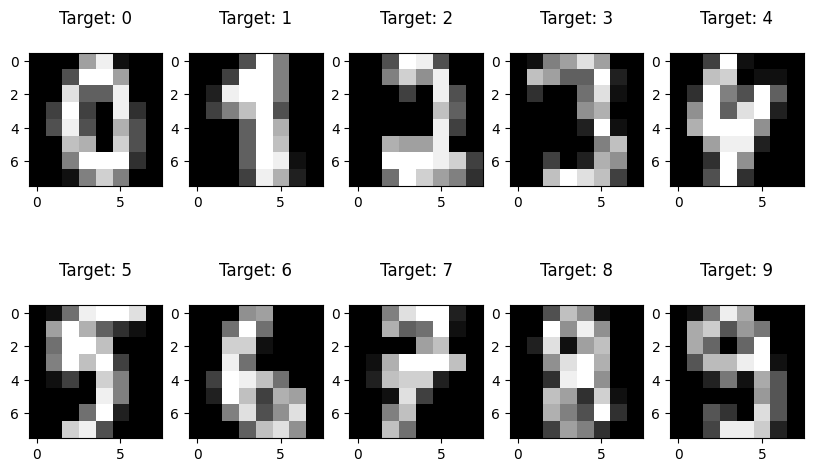

In [8]:
tmp = df_x.join(df_y).groupby('target').sample(1, random_state=42)

fig, axs = plt.subplots(2, 5, figsize=(10, 6))

for i, idx in enumerate(tmp.index):
    axs[i // 5, i % 5].set_title(f'Target: {tmp.loc[idx, "target"]}\n')
    axs[i // 5, i % 5].imshow(df_x.loc[idx, :].to_numpy().reshape(8, 8), cmap='gray');

plt.show();

Посмотрим на соотношение классов (там все хорошо!):

In [10]:
df_y.value_counts().sort_index()

,count
target,
0,178
1,182
2,177
3,183
4,181
5,182
6,181
7,179
8,174


Поделим наши данные на две выборки. Да, здесь у нас есть гиперпараметры, но мы будем использовать для их подбора алгоритм, в котором деление на обучение и валидацию происходит автоматически

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size=0.30, random_state=1, stratify=df_y  # stratify отвечает за пропорции классов
    )

print(x_train.shape, x_test.shape)

(1257, 64) (540, 64)


Обучим модель и посмотрим на предсказания

In [12]:
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=42)

Предсказывать можно сразу номер наиболее вероятного класса:

In [13]:
pred = logreg.predict(x_test)
pred[:2]

array([1, 3])

Или вероятности для каждого класса:

In [21]:
probs = logreg.predict_proba(x_test[:2])
probs

array([[1.94311042e-14, 9.99998921e-01, 4.58560564e-12, 4.71393969e-09,
        1.22672017e-07, 1.25732044e-11, 2.94424268e-11, 3.03527003e-11,
        1.26140728e-07, 8.25173429e-07],
       [7.67385874e-12, 1.48734238e-15, 3.88767650e-08, 9.99898092e-01,
        2.18359954e-15, 9.01982693e-10, 2.55125451e-12, 3.33386164e-11,
        4.99067251e-05, 5.19610960e-05]])

array([[ 0.,  0.,  0.,  2., 16., 15.,  3.,  0.,  0.,  0.,  0.,  8., 16.,
        16.,  4.,  0.,  0.,  0.,  9., 16., 16., 14.,  0.,  0.,  0.,  7.,
        16., 16., 16., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 16.,  7.,  0.,  0.,  0.,  0.,  0., 13., 16.,  7.,  0.]])

In [29]:
np.round(probs)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

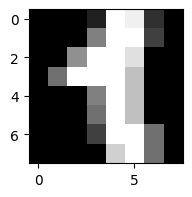

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))

test_sample_array = x_test[:1].to_numpy().reshape(8, 8)

# Отображаем изображение
img = ax.imshow(test_sample_array, cmap='gray')

Посмотрим на качество

In [37]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.96      0.93      0.95        57
           2       0.98      1.00      0.99        52
           3       0.95      1.00      0.97        52
           4       0.96      0.96      0.96        54
           5       0.96      0.93      0.95        57
           6       0.96      0.98      0.97        53
           7       0.98      0.96      0.97        55
           8       0.88      0.92      0.90        50
           9       0.98      0.95      0.96        56

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



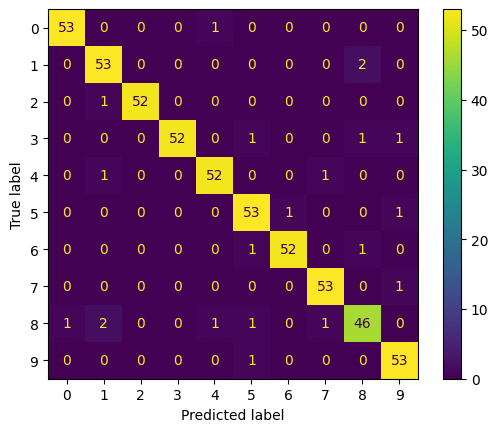

In [38]:
matrix = confusion_matrix(y_test, pred, labels=df_y.unique(), normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot();

Ошибки единичные, а в остальном все хорошо!

Посмотрим на примеры, где модель ошиблась. И увидим, что тут и человеку было бы непросто :)

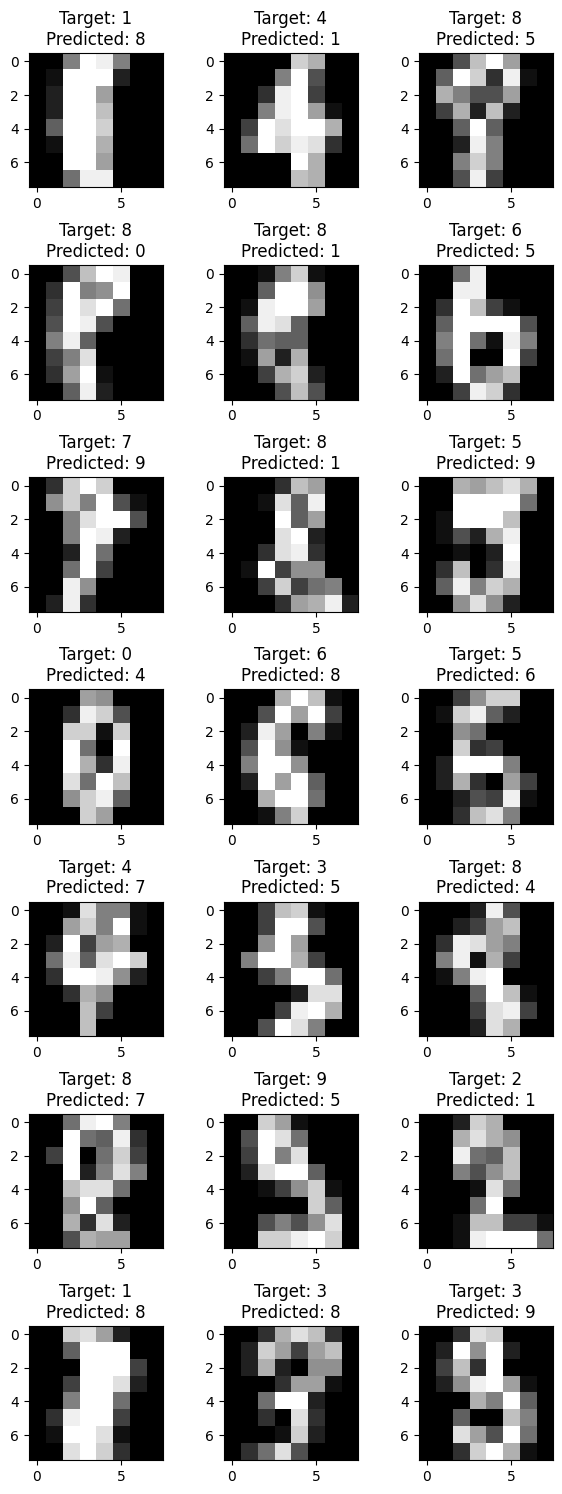

In [39]:
flag = pred != y_test
ys = y_test[flag]
prs = pred[flag]
xs = x_test[flag]

n_line = 3
fig, axs = plt.subplots(ys.shape[0] // n_line, n_line, figsize=(6, 15))

for i in range(ys.shape[0]):
    axs[i // n_line, i % n_line].set_title(f'Target: {ys.iloc[i]}\nPredicted: {prs[i]}')
    axs[i // n_line, i % n_line].imshow(xs.iloc[i].to_numpy().reshape(8, 8), cmap='gray');

fig.tight_layout()
plt.show();

### Cross-validation

Часто данные бывают настолько сложными, что аккуратно отделить сбалансированную и репрезентативную тестовую выборку почти невозможно. Из-за этого наша оценка качества модели оказывыается не заслуживающей доверия: мы можем как занизить ее (если выделим в тест слишком сложные и просто отличающиеся примеры), так и завысить (если тест окажется слишком простым).

В этот момент возникает идея __кросс-валидации__: вместо того, чтобы проводить единственное разделение на трейн и тест, мы делим все данные на какое-то количество одинаковых кусков, __фолдов__, и потом каждый из этих кусков временно делаем тестовой выборкой. После чего усредняем все полученные значения на тестах.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width=700>

Важно, что, если мы используем кросс-валидацию для подбора гиперпараметров, то какой-то кусочек данных все равно важно оставить для самой-самой честной и независимой оценки. Часто сделать его репрезентативным $-$ это отдельная сложная задача.

In [40]:
logreg = LogisticRegression(random_state=42)

cv_results = cross_validate(logreg, x_train, y_train, cv=5)  # cv отвечает за кол-во фолдов
pd.DataFrame(cv_results).sort_values(['test_score'], ascending=False)

,fit_time,score_time,test_score
0,0.487881,0.007458,0.980159
3,0.634726,0.007305,0.972112
2,0.604053,0.007286,0.964143
4,0.707885,0.008873,0.964143
1,0.675452,0.003095,0.956349


### Grid Search

Для подбора гиперпараметров существует специальный класс в библиотеке, который совмещает в себе поиск по сетке и кросс-валидацию. Фактически, для каждой комбинации параметров обучается столько моделей, сколько фолдов выставлено в настройках кросс-валидации (а это чаще всего много!).

In [41]:
parameters = {
    'penalty': ['l1', 'l2', None],  # тип регуляризация
    'C':[1, 10],  # обратная сила регуляризации, ака чем меньше значение, тем больше штрафуем
    'fit_intercept': [True, False]  # со смещением или без
}

logreg = LogisticRegression(solver='saga', random_state=42)
clf = GridSearchCV(logreg, parameters, cv=5, verbose=1)
clf.fit(x_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [45]:
cv_res = pd.DataFrame(clf.cv_results_)[['params', 'mean_fit_time', 'mean_test_score', 'rank_test_score']]
cv_res.sort_values('rank_test_score').style

,params,mean_fit_time,mean_test_score,rank_test_score
0,"{'C': 1, 'fit_intercept': True, 'penalty': 'l1'}",0.705585,0.971359,1
3,"{'C': 1, 'fit_intercept': False, 'penalty': 'l1'}",0.519701,0.971359,1
1,"{'C': 1, 'fit_intercept': True, 'penalty': 'l2'}",0.328631,0.970562,3
2,"{'C': 1, 'fit_intercept': True, 'penalty': None}",0.299394,0.970562,3
4,"{'C': 1, 'fit_intercept': False, 'penalty': 'l2'}",0.581526,0.970562,3
5,"{'C': 1, 'fit_intercept': False, 'penalty': None}",1.416681,0.970562,3
6,"{'C': 10, 'fit_intercept': True, 'penalty': 'l1'}",2.031687,0.970562,3
7,"{'C': 10, 'fit_intercept': True, 'penalty': 'l2'}",0.321409,0.970562,3
8,"{'C': 10, 'fit_intercept': True, 'penalty': None}",0.306784,0.970562,3
9,"{'C': 10, 'fit_intercept': False, 'penalty': 'l1'}",0.533872,0.970562,3


In [50]:
clf.best_params_

{'C': 1, 'fit_intercept': True, 'penalty': 'l1'}

In [49]:
clf.best_estimator_

LogisticRegression(C=1, penalty='l1', random_state=42, solver='saga')

In [51]:
logreg = clf.best_estimator_
pred = logreg.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.98      0.92      0.95        59
           2       0.98      1.00      0.99        52
           3       0.96      1.00      0.98        53
           4       0.94      0.98      0.96        52
           5       0.96      0.95      0.95        56
           6       0.96      0.98      0.97        53
           7       0.98      0.96      0.97        55
           8       0.90      0.92      0.91        51
           9       0.98      0.96      0.97        55

    accuracy                           0.96       540
   macro avg       0.96      0.97      0.96       540
weighted avg       0.97      0.96      0.96       540



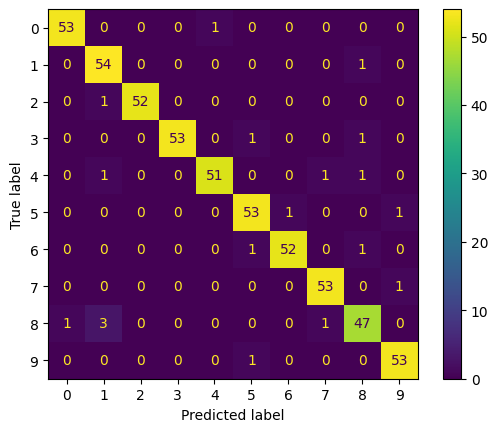

In [52]:
matrix = confusion_matrix(y_test, pred, labels=df_y.unique(), normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot();